In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_data.csv")

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,order_year,order_month,order_day,order_weekday,shipping_duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,Wednesday,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,Wednesday,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,Monday,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,Tuesday,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,Tuesday,7


In [19]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             9800 non-null   int64  
 1   order_id           9800 non-null   object 
 2   order_date         9800 non-null   object 
 3   ship_date          9800 non-null   object 
 4   ship_mode          9800 non-null   object 
 5   customer_id        9800 non-null   object 
 6   customer_name      9800 non-null   object 
 7   segment            9800 non-null   object 
 8   country            9800 non-null   object 
 9   city               9800 non-null   object 
 10  state              9800 non-null   object 
 11  postal_code        9800 non-null   object 
 12  region             9800 non-null   object 
 13  product_id         9800 non-null   object 
 14  category           9800 non-null   object 
 15  sub_category       9800 non-null   object 
 16  product_name       9800 

In [20]:
total_sales = df["sales"].sum()
total_sales


2261536.7827000003

In [21]:
df["sales"].mean()


230.7690594591837

In [22]:
region_sales = df.groupby("region")["sales"].sum().sort_values(ascending=False)
region_sales


region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: sales, dtype: float64

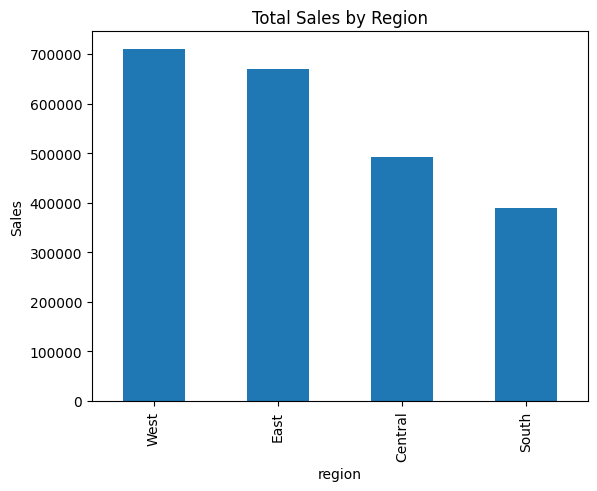

In [23]:
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()


In [24]:
category_sales = df.groupby("category")["sales"].sum().sort_values(ascending=False)
category_sales


category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: sales, dtype: float64

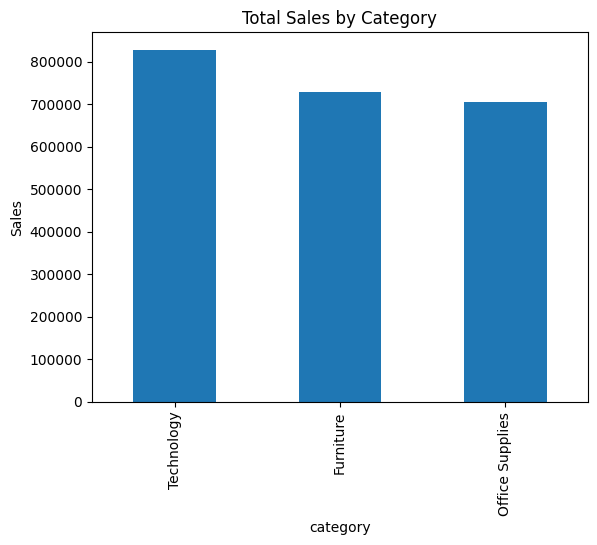

In [25]:
category_sales.plot(kind="bar")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()


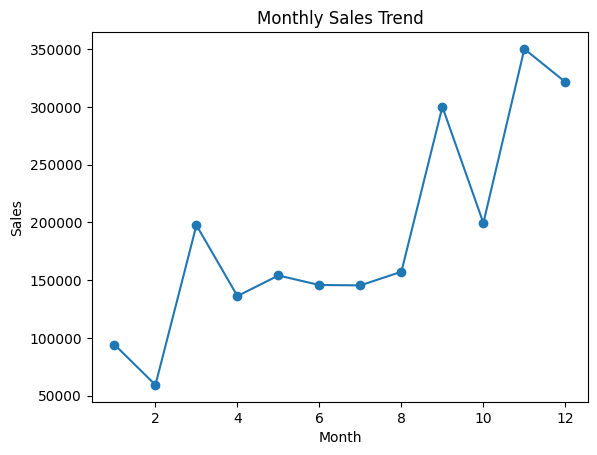

In [26]:
monthly_sales = df.groupby("order_month")["sales"].sum()

monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [27]:
df.groupby("ship_mode")["shipping_duration"].mean()


ship_mode
First Class       2.179214
Same Day          0.044610
Second Class      3.249211
Standard Class    5.008363
Name: shipping_duration, dtype: float64

In [28]:
df.groupby("order_year")["sales"].sum()


order_year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: sales, dtype: float64

### Insight: Yearly Sales Trend

Sales decreased slightly from 2015 to 2016.
However, from 2016 onwards, the company experienced strong growth.
2017 and 2018 show significant revenue increase, with 2018 being the highest performing year.

This indicates business expansion and improved sales performance in later years.


In [29]:
yearly_sales = df.groupby("order_year")["sales"].sum()
yearly_growth = yearly_sales.pct_change() * 100
yearly_growth


order_year
2015          NaN
2016    -4.255484
2017    30.636812
2018    20.303396
Name: sales, dtype: float64

### Insight: Year-over-Year Growth

The company experienced a small decline in 2016 (-4.25%).
However, 2017 showed a strong recovery with 30.6% growth.
Growth continued in 2018 with 20.3% increase in revenue.

This suggests successful expansion strategies or increased market demand after 2016.
Overall, the business demonstrates a strong upward trajectory.


In [30]:
df.groupby("segment")["sales"].sum().sort_values(ascending=False)



segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: sales, dtype: float64

### Insight: Customer Segment Performance

The Consumer segment generates the highest revenue, contributing over 1.1 million in sales.
Corporate customers represent the second largest segment.
Home Office contributes the least revenue.

This indicates the business is primarily driven by individual consumer purchases.
Marketing and retention strategies should prioritize the Consumer segment.


In [31]:
df.groupby("sub_category")["sales"].sum().sort_values(ascending=False)


sub_category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: sales, dtype: float64

### Insight: Sub-Category Performance

Phones and Chairs are the top revenue-generating sub-categories.
Technology and Furniture products dominate sales contribution.

Low-performing sub-categories such as Fasteners and Labels contribute minimal revenue.
The company may evaluate whether these low-performing products require st


In [32]:
df.groupby("order_month")["sales"].sum()


order_month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: sales, dtype: float64

### Insight: Monthly Sales Trend

Sales peak during the last quarter of the year, particularly in November and December.
This indicates strong seasonal demand, likely driven by holiday sales.
February records the lowest revenue, suggesting a post-holiday slowdown.
The business demonstrates clear seasonal patterns typical of retail operations.


In [33]:
df.groupby("customer_name")["sales"].sum().sort_values(ascending=False).head(10)


customer_name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: sales, dtype: float64

### Insight: Customer Concentration

The top customer contributes approximately 25,000 in sales.
Revenue is relatively well distributed across customers.
There is no extreme dependency on a single high-value client.

This indicates a diversified customer base, reducing revenue risk.


## Executive Summary

1. The West region generates the highest revenue.
2. Technology is the top-performing product category.
3. Phones and Chairs are the strongest sub-categories.
4. The Consumer segment drives most revenue.
5. The business shows strong growth after 2016.
6. Sales peak during Q4, especially November and December.
7. Shipping performance aligns with expected service levels.
8. Revenue is well distributed across customers.

Overall, the company demonstrates strong growth trends and healthy diversification.
Seasonality plays a major role in sales performance.
